<a href="https://colab.research.google.com/github/hayashiyus/First-steps-towards-Deep-Learning/blob/main/20_Linear-regression-models.ipynb" target="_parent">
 <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
#@title install packages
!pip install mplcyberpunk
!pip install watermark

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import mplcyberpunk

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.simplefilter('ignore')

### **1.　ベクトルと行列**

##### **問1：ベクトルの和と差**
ベクトルの和と差を計算してプロットしてください．

##### **例1**

answer1＝[3 2]


(-4.0, 4.0)

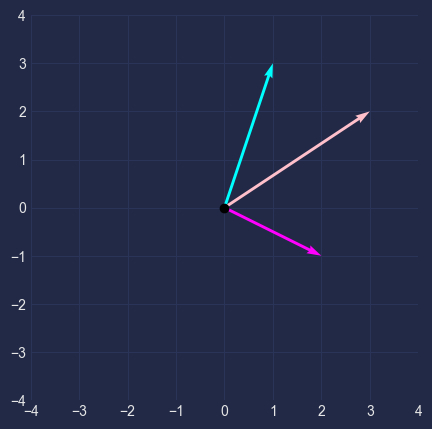

In [5]:
x = np.array([1, 3])
y = np.array([2, -1])

answer1 = x + y

print('answer1＝{0}'.format(answer1))

# 各ベクトルを並べて行列を作成
V = np.array([x, y, answer1])
# 各ベクトルの原点を行列で指定
origin = np.array([[0, 0, 0],[0, 0, 0]])

plt.rcParams["figure.figsize"] = (5,5)
plt.style.use("cyberpunk")
plt.quiver(origin[0,:], origin[1,:], V[:,0], V[:,1], angles='xy', scale_units='xy',color=['cyan','magenta','pink'], scale=1)
plt.plot(0, 0, 'ok')
plt.grid(b=True, which='major')
plt.xlim(-4, 4)
plt.ylim(-4, 4)

##### **回答欄1**
ベクトルの差を計算してプロットしてください．

answer2＝[-1  4]


(-4.0, 4.0)

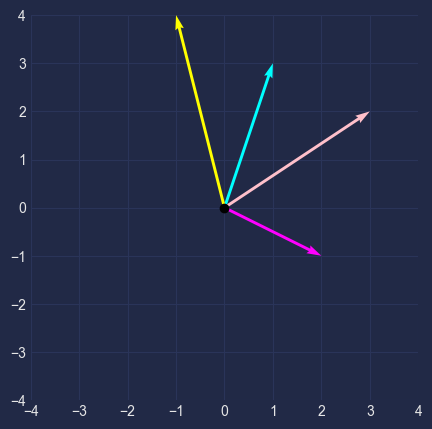

In [6]:
x = np.array([1, 3])
y = np.array([2, -1])

answer1 = x + y
answer2 = x - y

print('answer2＝{0}'.format(answer2))

# 各ベクトルを並べて行列を作成
V = np.array([x, y, answer1, answer2])
# 各ベクトルの原点を行列で指定
origin = np.array([[0, 0, 0, 0],[0, 0, 0, 0]])

plt.rcParams["figure.figsize"] = (5,5)
plt.quiver(origin[0,:], origin[1,:], V[:,0], V[:,1], angles='xy', scale_units='xy',color=['cyan','magenta','pink','yellow'], scale=1)
plt.plot(0, 0, 'ok')
plt.grid(b=True, which='major')
plt.xlim(-4, 4)
plt.ylim(-4, 4)

##### **問2：行列の和と差**
行列の和と差を計算してください．

##### **例2**

In [7]:
A = np.array([[1, 2],
              [4, 5]])
B = np.array([[8, 1],
              [-1, 0]])

answer1 = A + B

print('answer1')
print(answer1)

answer1
[[9 3]
 [3 5]]


##### **回答欄2**
ベクトルの差を計算してください．

In [8]:
A = np.array([[1, 2],
              [4, 5]])
B = np.array([[8, 1],
              [-1, 0]])

answer1 = A + B
answer2 = A - B

print('answer2')
print(answer2)

answer2
[[-7  1]
 [ 5  5]]


##### **問3：ベクトル・行列の積**
ベクトル x と y の内積，行列の積 AB と BA を計算してください．また，ABとBAが一致しないことを確認してください．
更に，行列とベクトルの積も計算してください．

##### **例3**

In [9]:
# ベクトルの内積 x・y
xy = np.dot(x, y)
# 行列の積 AB
AB = np.dot(A, B)
# 行列の積 BA
BA = np.dot(B, A)

print('xy＝{0}'.format(xy))
print('AB')
print(AB)
print('BA')
print(BA)

xy＝-1
AB
[[ 6  1]
 [27  4]]
BA
[[12 21]
 [-1 -2]]


##### **回答欄3**
行列とベクトルの積を計算してください．

In [10]:
# ベクトルと行列の積 Ax
Ax = np.dot(A, x)

print('Ax')
print(Ax)

Ax
[ 7 19]


### **2.　変換としての行列**

##### **問4：変換としての行列の機能を確認するための人工データを作成**
y = 0.8 * x に従う人工データを作成してください

##### **例4**

(-4.0, 4.0)

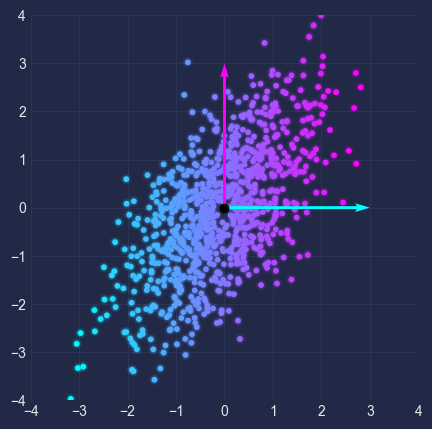

In [11]:
x = np.array([3, 0])
y = np.array([0, 3])

# 各ベクトルを並べて行列を作成
V = np.array([x, y])
# 各ベクトルの原点を行列で指定
origin = np.array([[0, 0],[0, 0]])

rng = np.random.RandomState(3)
sample = rng.randn(1000, 2)
sample[:, 1] += 0.8 * sample[:, 0]
colors = sample[:, 0]

plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(sample[:, 0], sample[:, 1], c=colors, s=10)
mplcyberpunk.make_scatter_glow()
plt.quiver(origin[0,:], origin[1,:], V[:,0], V[:,1], angles='xy', scale_units='xy',color=['cyan','magenta'], scale=1)
plt.plot(0, 0, 'ok')
plt.grid(b=True, which='major')
plt.xlim(-4, 4)
plt.ylim(-4, 4)

##### **問5：変換としての行列の機能を確認する**
問4で作成した人工データに回転行列をかけて，行列に座標変換の機能があることを確認してください．

##### **例5**

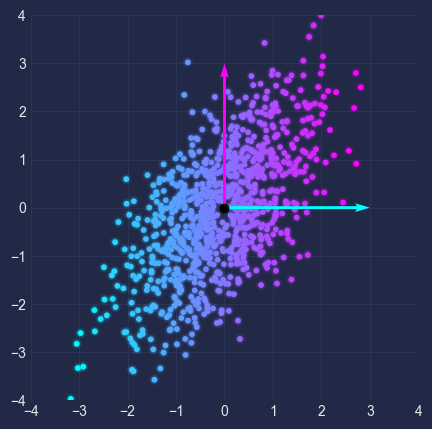

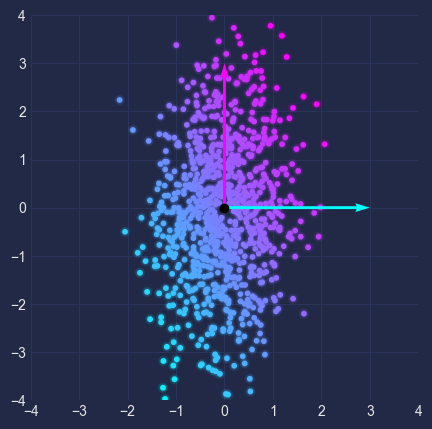

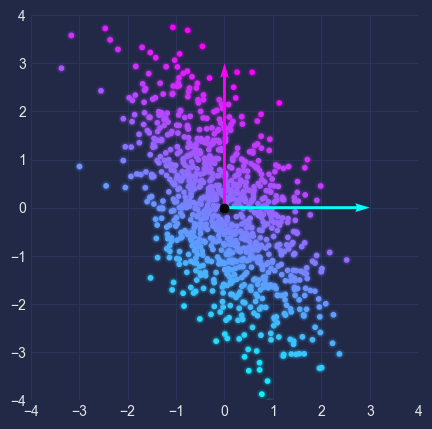

In [12]:
# 角度 θ を設定
theta = 0
# 回転行列 R を作成
R = np.array([[np.cos(np.radians(theta)), -np.sin(np.radians(theta))],
              [np.sin(np.radians(theta)), np.cos(np.radians(theta))]])

for i in np.arange(0,3):
    # 角度 θ を30度ずつ動かしていく
    theta = 30*i
    # 新しい θ に対応する回転行列を作成
    R = np.array([[np.cos(np.radians(theta)), -np.sin(np.radians(theta))],
                  [np.sin(np.radians(theta)), np.cos(np.radians(theta))]])
    # 各サンプルと行列の積 Rsample
    Rsample = sample @ R.T
    
    plt.scatter(Rsample[:, 0], Rsample[:, 1], c=colors, s=10)
    mplcyberpunk.make_scatter_glow()
    plt.rcParams["figure.figsize"] = (5,5)
    plt.quiver(origin[0,:], origin[1,:], V[:,0], V[:,1], angles='xy', scale_units='xy',color=['cyan','magenta'], scale=1)
    plt.plot(0, 0, 'ok')
    plt.grid(b=True, which='major')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.show()

##### **問6：変換としての行列の機能を確認する**
問4で作成した人工データに伸長行列をかけて，行列に座標変換の機能があることを確認してください．

##### **例6**

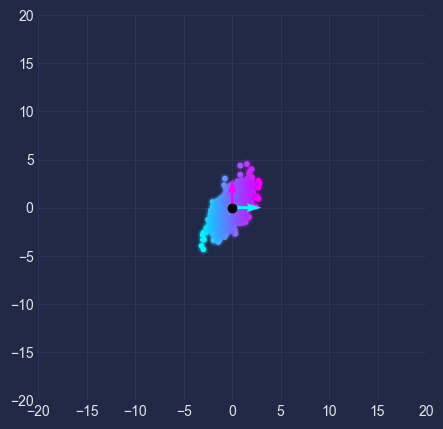

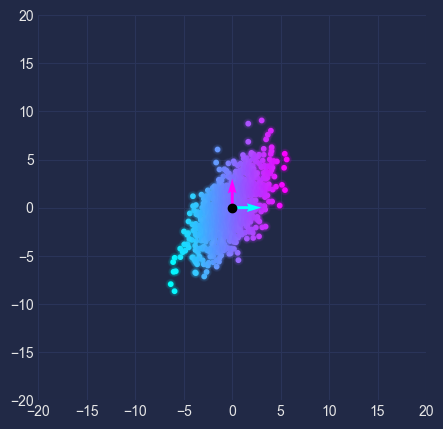

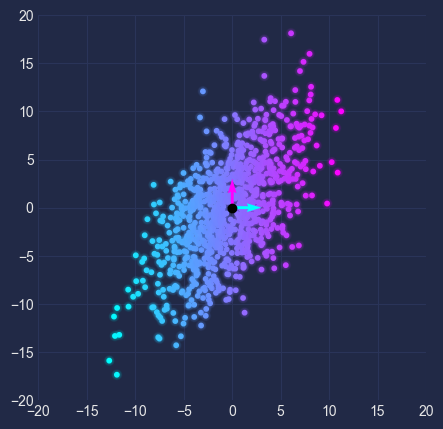

In [13]:
# サイズ s を設定
s = 1
# 伸長行列 L を作成
L = np.array([[s, 0],
              [0, s]])

for i in np.arange(0,3):
    # サイズ s に i を加える
    s += i
    # 新しい s に対応する回転行列を作成
    L = np.array([[s, 0],
                  [0, s]])
    # 各サンプルと行列の積 Lsample
    Lsample = sample @ L.T
    
    plt.rcParams["figure.figsize"] = (5,5)
    plt.scatter(Lsample[:, 0], Lsample[:, 1], c=colors, s=10)
    mplcyberpunk.make_scatter_glow()
    plt.quiver(origin[0,:], origin[1,:], V[:,0], V[:,1], angles='xy', scale_units='xy',color=['cyan','magenta'], scale=1)
    plt.plot(0, 0, 'ok')
    plt.grid(b=True, which='major')
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
    plt.show()

### **3.　多変数テイラー展開とヘッセ行列**

##### **Tips**
多変量テイラー展開の2次の項をベクトルを使って整理するとヘッセ行列があらわれた．
$$f\left(x+\epsilon_x, y+\epsilon_y\right)=f(x, y)+\left(\begin{array}{ll}
\epsilon_x & \epsilon_y
\end{array}\right)\left(\begin{array}{c}
\frac{\partial f(x, y)}{\partial x} \\
\frac{\partial f(x, y)}{\partial y}
\end{array}\right)+\frac{1}{2}\left(\begin{array}{ll}
\epsilon_x & \epsilon_y
\end{array}\right)\left(\begin{array}{cc}
\frac{\partial^2 f(x, y)}{\partial x^2} & \frac{\partial^2 f(x, y)}{\partial x \partial y} \\
\frac{\partial^2 f(x, y)}{\partial y \partial x} & \frac{\partial^2 f(x, y)}{\partial y^2}
\end{array}\right)\left(\begin{array}{l}
\epsilon_x \\
\epsilon_y
\end{array}\right)$$
このヘッセ行列 $H$ を使うと多変数関数の極大値，極小値を判定することができた．$\frac{\partial f}{\partial x}=0, \frac{\partial f}{\partial y}=0$ かつヘッセ行列の行列式 $\det{H} > 0$ となる $(x, y)$ で極小値，$\frac{\partial f}{\partial x}=0, \frac{\partial f}{\partial y}=0$ かつヘッセ行列の行列式 $\det{H} < 0$ となる $(x, y)$ で極大値をとる．

##### **問7：ヘッセ行列の極値判定条件を具体例で確認する**
$$\begin{aligned}
r &= \sqrt{x^2+y^2} \\
z =& f(x, y) = \sin(r)
\end{aligned}$$
この多変数関数 $f(x, y)$ について np.gradient() を使ってヘッセ行列を計算し，$x^2+y^2=\left(\frac{\pi}{2}\right)^{2}$ 上の $(x, y)$ でヘッセ行列の行列式 $\det{H}$ を計算し，極値条件の判定を行なってください．

##### **例7**

(160, 160)
(160, 160)
(160, 160)


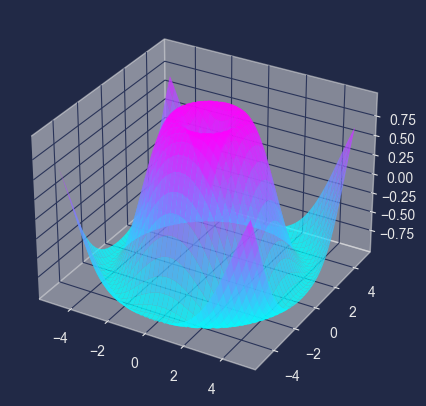

In [14]:
# 関数　f(x,y)　を定義
def f(x, y):
    r = np.sqrt(x**2 + y**2)
    return np.sin(r)

dx = 0.0625
dy = 0.0625
x = np.arange(-5, 5, dx)
y = np.arange(-5, 5, dy)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

print(X.shape)
print(Y.shape)
print(Z.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.cool, alpha=0.8)

(2, 2, 160, 160)


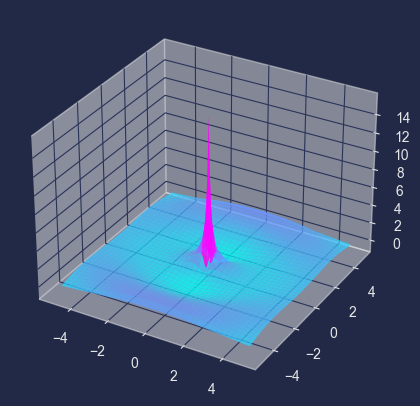

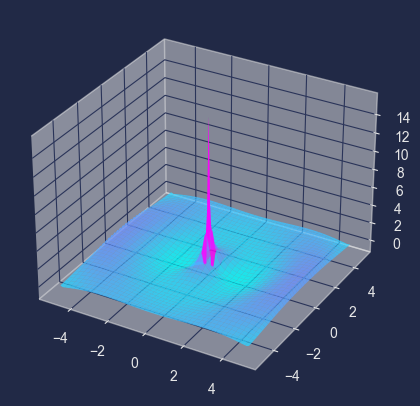

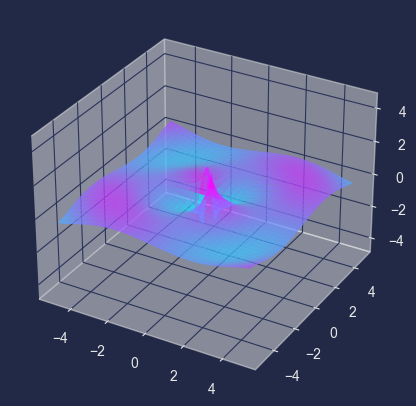

In [15]:
# ヘッセ行列を定義
def hessian(X):
    X_grad = np.gradient(X, dx, dy) 
    hessian = np.empty((X.ndim, X.ndim) + X.shape, dtype=X.dtype) 
    for k, grad_k in enumerate(X_grad):
        second_grad = np.gradient(grad_k, dx, dy) 
        for l, grad_kl in enumerate(second_grad):
            hessian[k, l, :, :] = grad_kl
    return hessian

H = hessian(Z)
print(H.shape)

# ヘッセ行列 H の H[0][0] 成分は df2/dx2 に対応
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, H[0][0], cmap=plt.cm.cool, alpha=0.8)
plt.show()
# ヘッセ行列 H の H[1][1] 成分は df2/dy2 に対応
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, H[1][1], cmap=plt.cm.cool, alpha=0.8)
plt.show()
# ヘッセ行列 H の H[0][1]=H[1][0] 成分は df2/dxdy に対応
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, H[0][1], cmap=plt.cm.cool, alpha=0.8)
plt.show()

$x^2+y^2 = \left(\frac{\pi}{2}\right)^{2}$ のとき，ヘッセ行列 $H$ は 
$$H = \left(\begin{array}{ll}
-\frac{x^2}{r^2} & \frac{xy}{r^2} \\
\frac{xy}{r^2} & -\frac{y^2}{r^2}
\end{array}\right)$$
となるので，ヘッセ行列の行列式は
$\det{H} = \frac{x^2y^2}{r^4} - \frac{x^2y^2}{r^4} = 0$ となる．

In [16]:
# 例えば x=π/2，y=0 のとき，　f(x,y)=sin(r)=1 で　f(x,y)　は最大値をとるが sin(r) の周期性があるため極大値ではない
H0 = np.array([[-1,0],
               [0,0]])

# x=π/2，y=0 のときのヘッセ行列の行列式を計算
print(np.linalg.det(H0))

0.0


### **4.　情報幾何入門**

##### **ボーナス情報**
ヘッセ行列の概念を使うと，統計モデル／機械学習モデルのパラメータ空間が曲がっていることが理解できるようになります．<br>
統計モデル／機械学習モデルのパラメータ空間が曲がっていることを確認するために，正規分布のパラメータ空間を可視化してみます．

Text(0, 0.5, 'standard deviation')

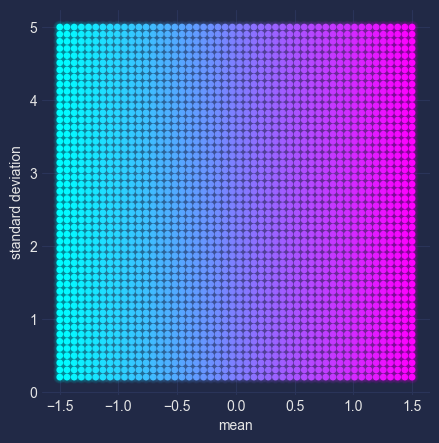

In [17]:
n_samples = 50

# 平均 μ (-1.5,　1.5) 標準偏差 σ (0.2, 5) の範囲で
# 正規分布のパラメータ空間を可視化するために grid(50×50=2500) を作成する
grid = []
for i in np.linspace(-1.5, 1.5, n_samples):
    for j in np.linspace(.2, 5, n_samples):
        grid.append([i, j])

grid = np.array(grid)
colors = grid[:, 0]

plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(grid[:, 0], grid[:, 1], s=15, c=colors)
mplcyberpunk.make_scatter_glow()
plt.xlabel('mean')
plt.ylabel('standard deviation')

In [18]:
def getDistance(x, y):
    aa = x[0] - y[0]
    ab = x[1] + y[1]
    bb = x[1] - y[1]
    num = np.sqrt((aa**2+ab**2))+np.sqrt((aa**2+bb**2))
    den = np.sqrt((aa**2+ab**2))-np.sqrt((aa**2+bb**2))
    ret = np.log(num/den)
    return ret

similarities = []
for x in grid:
    similarity = []
    for y in grid:
        similarity.append(getDistance(x,y))
    similarities.append(similarity)

distances = np.array(similarities)

(-3.183058526375696, 3.1102524566406, -2.7059128767455096, 1.034504457902677)

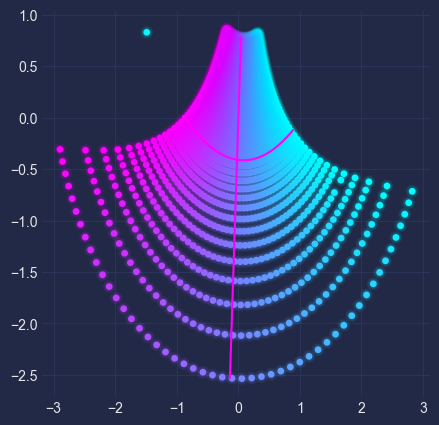

In [20]:
from sklearn import manifold

mds2d = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=rng,
                     dissimilarity="precomputed", n_jobs=1)
embedded2d = mds2d.fit(distances).embedding_

x = np.linspace(-0.89, 0.89, 100)
y = 0.455*x**2 - 3.39 + np.exp(-0.034*(x+0.9)) + np.exp(-0.005*(x+0.2)) + np.exp(-0.008*(x+0.3)) + np.exp(0.028*(x-0.4)) - np.exp(0.06*(x-0.4))
x1 = np.linspace(-7.3**(-1), 23.7**(-1), 100)
y1 = 18.5*x1

plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(embedded2d[:, 0], embedded2d[:, 1], s=15, c=colors)
mplcyberpunk.make_scatter_glow()
plt.plot(x, y, c='magenta', lw=1.5)
plt.plot(x1, y1, c='magenta', lw=1.5)
plt.axis('tight')

In [21]:
%load_ext watermark
%watermark --iversions

matplotlib  : 3.6.0
numpy       : 1.22.1
mplcyberpunk: 0.6.0
sklearn     : 0.0
pandas      : 1.5.0

